In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Задача 1 

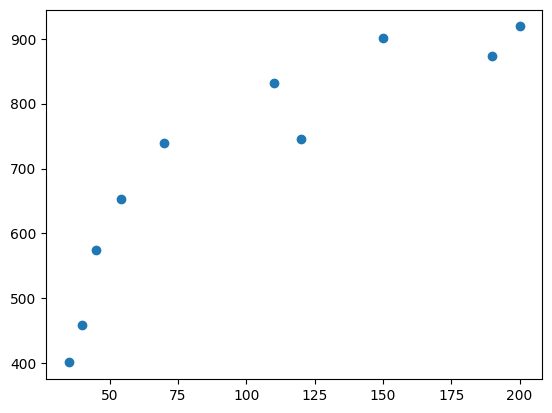

In [61]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter (x1, y1)

In [62]:
b1 = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b0 = np.mean(ks) - b1*np.mean(zp)
b0, b1

(444.1773573243596, 2.620538882402765)

In [63]:
from sklearn.linear_model import LinearRegression

zp_rs = zp.reshape(10, 1)
model = LinearRegression()
model.fit(zp_rs, ks)
const = model.intercept_
beta = model.coef_[0]
const, beta

(444.17735732435943, 2.6205388824027667)

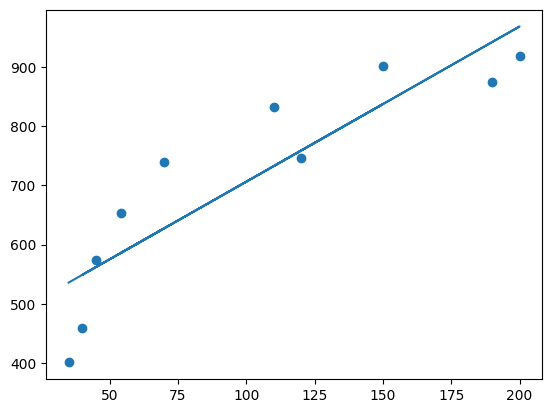

In [64]:
plt.scatter (x1, y1)
plt.plot(zp, 2.6205*zp+444.1773)

In [65]:
# Т.е. при изменении заработной платы на 1 кредитный скорринг увлеличивается на 2,62

In [66]:
#1 Матричный метод без константы
ks_rs = ks.reshape(10, 1)
XTX = zp_rs.T.dot(zp_rs)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(zp_rs.T).dot(ks_rs)
b

array([[5.88982042]])

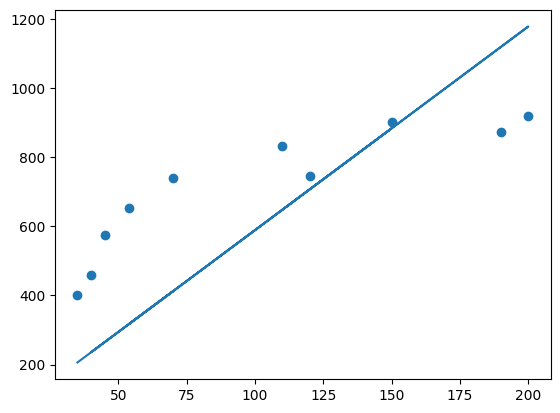

In [67]:
plt.scatter (x1, y1)
plt.plot(zp, 5.8898*zp)

In [75]:
#2 Градиентный спуск без константы
def mse_(b1):
    return np.sum((b1*zp-ks)**2)/n

In [76]:
alpha = 1e-6
b1 = 0.1
n = len (zp)

In [77]:
for i in range (100000):
    b1 -= alpha * (2/n) * np.sum((b1 * zp - ks) * zp)
    if i % 5000 == 0:
        print (f'iteration = (i), b1 = {b1}, mse = {mse_(b1)}')
        
print ("y =", b1, "*x")

iteration = (i), b1 = 0.25952808, mse = 493237.7212546963
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.889820420132673, mse = 56516.85841571943
iteration = (i), b1 = 5.88982042

In [78]:
#3 Градиентный спуск без константы
def mse_const(b0, b1):
    return np.sum((b0+b1*zp-ks)**2)/n

In [92]:
alpha = 8e-6
b0 = 0.1
b1 = 0.1
n = len (zp)

In [96]:
for i in range (2700000):
    ks_pr = b0 + b1*zp
    b1 -= alpha * (2/n) * np.sum((ks_pr - ks) * zp)
    b0 -= alpha * (2/n) * np.sum(ks_pr - ks)
    if i % 100000 == 0:
        print (f'iteration = {i}, b0 = {b0}, b1 = {b1}, mse = {mse_const(b0, b1)}')
        
print (f'y = {b0} + {b1}*x')

iteration = 0, b0 = 444.1773572345347, b1 = 2.620538883063915, mse = 6470.414201176663
iteration = 100000, b0 = 444.1773572643367, b1 = 2.6205388828445595, mse = 6470.41420117666
iteration = 200000, b0 = 444.17735728413993, b1 = 2.6205388826987996, mse = 6470.414201176655
iteration = 300000, b0 = 444.17735729724325, b1 = 2.6205388826023532, mse = 6470.41420117666
iteration = 400000, b0 = 444.17735730598105, b1 = 2.620538882538038, mse = 6470.414201176658
iteration = 500000, b0 = 444.1773573116654, b1 = 2.6205388824962, mse = 6470.414201176659
iteration = 600000, b0 = 444.17735731734973, b1 = 2.6205388824543614, mse = 6470.41420117666
iteration = 700000, b0 = 444.1773573173565, b1 = 2.620538882454311, mse = 6470.414201176662
iteration = 800000, b0 = 444.1773573173565, b1 = 2.620538882454311, mse = 6470.414201176662
iteration = 900000, b0 = 444.1773573173565, b1 = 2.620538882454311, mse = 6470.414201176662
iteration = 1000000, b0 = 444.1773573173565, b1 = 2.620538882454311, mse = 6470.41